<a href="https://colab.research.google.com/github/varshil1/Algorithmic-paper-trading-using-Deep-Reinforcement-Learning/blob/main/Algorithmic_Trading_Using_Deep_Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Algorithmic Trading using Deep Reinforcement Learning

This is an application for paper Trading, to test the strategies of investing in real market and observe its performance , before investing the real money.

##What Is Paper Trade?
A paper trade is a simulated trade that allows an investor to practice buying and selling without risking real money. The term dates back to a time when (before the proliferation of online trading platforms) aspiring traders would practice on paper before risking money in live markets. While learning, a paper trader records all trades by hand to keep track of hypothetical trading positions, portfolios, and profits or losses. Today, most practice trading involves the use of an electronic stock market simulator, which looks and feels like an actual trading platform.

*   Paper trading is simulated trading that allows investors to practice buying and selling securities.
*   Paper trading can test a new investment strategy before employing it in a live account.
*   Many online brokers offer clients paper trade accounts.
*   Paper trades teach novices how to navigate platforms and make trades, but may not represent the true emotions that occur during real market conditions.



# Steps to be performed for algorithmic trading



1.   Setup Alpaca Paper Trading API
2.   Train DRL model
3.   Deploy to Alpaca Paper Trading API



## Part 1 : Setup Alpaca Paper trading API

### Alpaca trading API

Alpaca Stock Trading API is built for algorithmic trading and building apps for commission-free.

Documentation : https://alpaca.markets/docs/

We are using alpaca because its easy to use, has good interface for algo-trading, beginner friendly and can access unlimited testing of the strategies .

Register in alpaca from https://alpaca.markets and get your API Key ID & Secret ID.

### Get the API Keys Ready


In [1]:
API_KEY = "PKCZZBRQFEDR2336LBCE"
API_SECRET = "vJbaHiuJ51ZsjKLV3XcRCLWT5m7mbMemtfmbYQU2"
APCA_API_BASE_URL = 'https://paper-api.alpaca.markets'
data_url = 'wss://data.alpaca.markets'

## Part 2 : Train DRL model

### Steps to train the model

1.  Install FinRL
2.  Get data
3.  Clean Data
4.  Split the data
5. Train the data
6.  Test The data





### Install FinRl
FinRL is an open-source framework to help practitioners establish the development pipeline of trading strategies based on deep reinforcement learning (DRL).

Documentation : https://finrl.readthedocs.io/en/latest/index.html

In [2]:
## install finrl library
!pip install git+https://github.com/AI4Finance-LLC/FinRL-Library.git

  Cloning https://github.com/AI4Finance-LLC/FinRL-Library.git to /tmp/pip-req-build-ahu5imhh
  Running command git clone -q https://github.com/AI4Finance-LLC/FinRL-Library.git /tmp/pip-req-build-ahu5imhh
  Cloning https://github.com/quantopian/pyfolio.git to /tmp/pip-install-1ayp3nyi/pyfolio_3d7146c538c540cd90f446c44c46f97b
  Running command git clone -q https://github.com/quantopian/pyfolio.git /tmp/pip-install-1ayp3nyi/pyfolio_3d7146c538c540cd90f446c44c46f97b
  Cloning https://github.com/AI4Finance-Foundation/ElegantRL.git to /tmp/pip-install-1ayp3nyi/elegantrl_8e308231806d4c9cbd4ea3c094950291
  Running command git clone -q https://github.com/AI4Finance-Foundation/ElegantRL.git /tmp/pip-install-1ayp3nyi/elegantrl_8e308231806d4c9cbd4ea3c094950291
     |████████████████████████████████| 73 kB 1.7 MB/s 
     |████████████████████████████████| 174 kB 47.4 MB/s 
     |████████████████████████████████| 54.7 MB 1.1 MB/s 
     |████████████████████████████████| 1.8 MB 45.5 MB/s 
     |██████

In [3]:
# Importing modules

import numpy as np
import pandas as pd

# FinRl modules
from finrl.train import train #get train data
from finrl.test import test #get test data
from finrl.apps.config import DOW_30_TICKER #config.DOW_30_TICKER will give a list of tickers of stocks in DOW Jones(TOP 30 stocks of USA stock market)
from finrl.apps.config import TECHNICAL_INDICATORS_LIST # TECHNICAL_INDICATORS_LIST will give a list of all default technical indicators,
from finrl.neo_finrl.env_stock_trading.env_stocktrading_np import StockTradingEnv #Enviroment for stock trading
from finrl.neo_finrl.env_stock_trading.env_stock_papertrading import AlpacaPaperTrading #Use alpaca trading for deployement
from finrl.neo_finrl.data_processor import DataProcessor # data clean is done using this module
from finrl.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline # plotting different items 


/usr/local/lib/python3.7/dist-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; multipliers will not be applied'


In [4]:
# getting all stocks of DOW_30

ticker_list = DOW_30_TICKER
action_dim = len(DOW_30_TICKER)
print(ticker_list)

['AXP', 'AMGN', 'AAPL', 'BA', 'CAT', 'CSCO', 'CVX', 'GS', 'HD', 'HON', 'IBM', 'INTC', 'JNJ', 'KO', 'JPM', 'MCD', 'MMM', 'MRK', 'MSFT', 'NKE', 'PG', 'TRV', 'UNH', 'CRM', 'VZ', 'V', 'WBA', 'WMT', 'DIS', 'DOW']


In [5]:
# Print technical indicators
print(TECHNICAL_INDICATORS_LIST)

['macd', 'boll_ub', 'boll_lb', 'rsi_30', 'cci_30', 'dx_30', 'close_30_sma', 'close_60_sma']


#### Technical indicators 

* 'macd': Moving average convergence divergence (MACD)
* 'boll_ub': Upper bound of bollinger band
* 'boll_lb':  Upper bound of bollinger band
* 'rsi_30':  Relative Strength Index (RSI)
* 'cci_30': Commodity Channel Index(CCI)
* 'dx_30': optional directional index
* 'close_30_sma': Close Simple Moving Average (SMA) 
* 'close_60_sma': Close Simple Moving Average (SMA) 

#### Calculate the DRL state dimension manually for paper trading

In [6]:
# amount + (turbulence, turbulence_bool) + (price, shares, cd (holding time)) * stock_dim + tech_dim
state_dim = 1 + 2 + 3 * action_dim + len(TECHNICAL_INDICATORS_LIST) * action_dim
state_dim

333

In [7]:
# Setting enviroment
env = StockTradingEnv

#### Get data

In [8]:
# Declare the dataprocessor as Dp to get data from alpaca
DP = DataProcessor(data_source = 'alpaca',
                  API_KEY = API_KEY, 
                  API_SECRET = API_SECRET, 
                  APCA_API_BASE_URL = APCA_API_BASE_URL
                  )

Alpaca successfully connected


In [9]:
#Get ticker list, Set start date and end date, specify the data frequency
data = DP.download_data(start_date = '2021-10-01', 
                        end_date = '2021-10-05',
                        ticker_list = ticker_list, 
                        time_interval= '1Min')

Data before 2021-10-01T15:59:00-04:00 is successfully fetched
Data before 2021-10-02T15:59:00-04:00 is successfully fetched
Data before 2021-10-03T15:59:00-04:00 is successfully fetched
Data before 2021-10-04T15:59:00-04:00 is successfully fetched
Data before 2021-10-05T15:59:00-04:00 is successfully fetched


#### Clean data

In [10]:
data = DP.clean_data(data) # Clean data
data = DP.add_technical_indicator(data, TECHNICAL_INDICATORS_LIST)# get specified technical indicatotors
data = DP.add_vix(data) # Volatility Index 

Data clean finished!
Succesfully add technical indicators
Data before 2021-10-01T15:59:00-04:00 is successfully fetched
Data before 2021-10-02T15:59:00-04:00 is successfully fetched
Data before 2021-10-03T15:59:00-04:00 is successfully fetched
Data before 2021-10-04T15:59:00-04:00 is successfully fetched
Data before 2021-10-05T15:59:00-04:00 is successfully fetched
Data clean finished!


In [11]:
data.head(10)

,time,open,high,low,close,volume,tic,macd,boll_ub,boll_lb,rsi_30,cci_30,dx_30,close_30_sma,close_60_sma,VIXY
0,2021-10-01 09:30:00-04:00,141.910,141.990,141.530,141.890,10967.0,AAPL,0.0,NaN,NaN,NaN,NaN,NaN,141.890,141.890,22.22
1,2021-10-01 09:30:00-04:00,213.360,213.360,213.360,213.360,450.0,AMGN,0.0,NaN,NaN,NaN,NaN,NaN,213.360,213.360,22.22
2,2021-10-01 09:30:00-04:00,174.740,174.740,174.740,174.740,0.0,AXP,0.0,NaN,NaN,NaN,NaN,NaN,174.740,174.740,22.22
3,2021-10-01 09:30:00-04:00,223.230,223.830,223.230,223.770,1992.0,BA,0.0,NaN,NaN,NaN,NaN,NaN,223.770,223.770,22.22
4,2021-10-01 09:30:00-04:00,193.055,193.360,193.055,193.280,574.0,CAT,0.0,NaN,NaN,NaN,NaN,NaN,193.280,193.280,22.22
5,2021-10-01 09:30:00-04:00,271.365,273.330,271.365,272.975,1491.0,CRM,0.0,NaN,NaN,NaN,NaN,NaN,272.975,272.975,22.22
6,2021-10-01 09:30:00-04:00,54.580,54.645,54.540,54.570,2713.0,CSCO,0.0,NaN,NaN,NaN,NaN,NaN,54.570,54.570,22.22
7,2021-10-01 09:30:00-04:00,102.430,102.430,102.430,102.430,300.0,CVX,0.0,NaN,NaN,NaN,NaN,NaN,102.430,102.430,22.22
8,2021-10-01 09:30:00-04:00,172.440,172.895,172.420,172.895,2547.0,DIS,0.0,NaN,NaN,NaN,NaN,NaN,172.895,172.895,22.22
9,2021-10-01 09:30:00-04:00,57.690,57.995,57.690,57.995,2460.0,DOW,0.0,NaN,NaN,NaN,NaN,NaN,57.995,57.995,22.22


#### Convert dataframe into numpy array

In [12]:
price_array, tech_array, turbulence_array = DP.df_to_array(data, if_vix='True')
price_array

Successfully transformed into array


array([[141.89 , 213.36 , 174.74 , ...,  54.09 ,  47.075, 139.575],
       [141.42 , 212.62 , 168.69 , ...,  54.17 ,  47.16 , 139.53 ],
       [141.08 , 212.5  , 169.46 , ...,  54.11 ,  47.17 , 139.445],
       ...,
       [141.26 , 211.87 , 175.06 , ...,  54.595,  47.13 , 136.78 ],
       [141.12 , 211.85 , 174.98 , ...,  54.535,  47.11 , 136.68 ],
       [140.98 , 211.77 , 174.74 , ...,  54.5  ,  47.09 , 136.62 ]])

#### Train the data

In [13]:
# This are the default params referenced from FinRl
ERL_PARAMS = {"learning_rate": 3e-6,"batch_size": 2048,"gamma":  0.985,
        "seed":312,"net_dimension":512, "target_step":5000, "eval_gap":30}


Here we are using the PPO algorithm for building tha agent. The mathematical approach for the Proximal Policy optimization(PPO) is given in the theory section after the codes. **Please refer the theory before directly diving into the code.**

In [14]:
train(start_date = '2021-10-11', 
      end_date = '2021-10-15',
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= '1Min', 
      technical_indicator_list= TECHNICAL_INDICATORS_LIST,
      drl_lib='elegantrl', 
      env=env,
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      APCA_API_BASE_URL = APCA_API_BASE_URL,
      erl_params=ERL_PARAMS,
      cwd='./papertrading_erl', #current_working_dir
      break_step=1e5)

Alpaca successfully connected
Data before 2021-10-11T15:59:00-04:00 is successfully fetched
Data before 2021-10-12T15:59:00-04:00 is successfully fetched
Data before 2021-10-13T15:59:00-04:00 is successfully fetched
Data before 2021-10-14T15:59:00-04:00 is successfully fetched
Data before 2021-10-15T15:59:00-04:00 is successfully fetched
Data clean finished!
Succesfully add technical indicators
Data before 2021-10-11T15:59:00-04:00 is successfully fetched
Data before 2021-10-12T15:59:00-04:00 is successfully fetched
Data before 2021-10-13T15:59:00-04:00 is successfully fetched
Data before 2021-10-14T15:59:00-04:00 is successfully fetched
Data before 2021-10-15T15:59:00-04:00 is successfully fetched
Data clean finished!
Successfully transformed into array
| Remove cwd: ./papertrading_erl
| build_env(): Warning. NOT suggest to use `deepcopy(env)`. env_name: StockEnv
| build_env(): Warning. NOT suggest to use `deepcopy(env)`. env_name: StockEnv
############################################

#### Test the data
The purpose of backtesting is to tune model hyperparameters, make sure that we get a positive and valid return/reward (model converges), and get a good performing strategy.

In [15]:
account_value_erl=test(start_date = '2021-10-18', 
                      end_date = '2021-10-19',
                      ticker_list = ticker_list, 
                      data_source = 'alpaca',
                      time_interval= '1Min', 
                      technical_indicator_list= TECHNICAL_INDICATORS_LIST,
                      drl_lib='elegantrl', 
                      env=env, 
                      model_name='ppo', 
                      API_KEY = API_KEY, 
                      API_SECRET = API_SECRET, 
                      APCA_API_BASE_URL = APCA_API_BASE_URL,
                      cwd='./papertrading_erl',
                      net_dimension = 512)

Alpaca successfully connected
Data before 2021-10-18T15:59:00-04:00 is successfully fetched
Data before 2021-10-19T15:59:00-04:00 is successfully fetched
Data clean finished!
Succesfully add technical indicators
Data before 2021-10-18T15:59:00-04:00 is successfully fetched
Data before 2021-10-19T15:59:00-04:00 is successfully fetched
Data clean finished!
Successfully transformed into array
price_array:  780


/usr/local/lib/python3.7/dist-packages/finrl/drl_agents/elegantrl/models.py:122: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  s_tensor = _torch.as_tensor((state,), device=device)


Test Finished!
episode_return 1.0123081188215866


After tuning well, retrain on the training and testing sets, use full data to train

In [16]:
train(start_date = '2021-10-11', 
      end_date = '2021-10-19',
      ticker_list = ticker_list, 
      data_source = 'alpaca',
      time_interval= '1Min', 
      technical_indicator_list= TECHNICAL_INDICATORS_LIST,
      drl_lib='elegantrl', 
      env=env, 
      model_name='ppo', 
      API_KEY = API_KEY, 
      API_SECRET = API_SECRET, 
      APCA_API_BASE_URL = APCA_API_BASE_URL ,
      cwd='./papertrading_erl_retrain',
      break_step=5e4)

Alpaca successfully connected
Data before 2021-10-11T15:59:00-04:00 is successfully fetched
Data before 2021-10-12T15:59:00-04:00 is successfully fetched
Data before 2021-10-13T15:59:00-04:00 is successfully fetched
Data before 2021-10-14T15:59:00-04:00 is successfully fetched
Data before 2021-10-15T15:59:00-04:00 is successfully fetched
Data before 2021-10-16T15:59:00-04:00 is successfully fetched
Data before 2021-10-17T15:59:00-04:00 is successfully fetched


sleep 3 seconds and retrying https://data.alpaca.markets/v1/bars/1Min 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1/bars/1Min 3 more time(s)...


Data before 2021-10-18T15:59:00-04:00 is successfully fetched


sleep 3 seconds and retrying https://data.alpaca.markets/v1/bars/1Min 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1/bars/1Min 3 more time(s)...
sleep 3 seconds and retrying https://data.alpaca.markets/v1/bars/1Min 3 more time(s)...


Data before 2021-10-19T15:59:00-04:00 is successfully fetched
Data clean finished!
Succesfully add technical indicators
Data before 2021-10-11T15:59:00-04:00 is successfully fetched
Data before 2021-10-12T15:59:00-04:00 is successfully fetched
Data before 2021-10-13T15:59:00-04:00 is successfully fetched
Data before 2021-10-14T15:59:00-04:00 is successfully fetched
Data before 2021-10-15T15:59:00-04:00 is successfully fetched
Data before 2021-10-16T15:59:00-04:00 is successfully fetched
Data before 2021-10-17T15:59:00-04:00 is successfully fetched
Data before 2021-10-18T15:59:00-04:00 is successfully fetched
Data before 2021-10-19T15:59:00-04:00 is successfully fetched
Data clean finished!
Successfully transformed into array
| Remove cwd: ./papertrading_erl_retrain
| build_env(): Warning. NOT suggest to use `deepcopy(env)`. env_name: StockEnv
| build_env(): Warning. NOT suggest to use `deepcopy(env)`. env_name: StockEnv
##################################################################

## Part 3 : Deploy to Alpaca Paper Trading API

Setup Alpaca Paper trading environment

In [17]:
import datetime
import threading
from finrl.neo_finrl.data_processors.processor_alpaca import AlpacaProcessor
import alpaca_trade_api as tradeapi
import time
import pandas as pd
import numpy as np
import torch
import gym

class AlpacaPaperTrading():

    def __init__(self,ticker_list, time_interval, drl_lib, agent, cwd, net_dim, 
                 state_dim, action_dim, API_KEY, API_SECRET, 
                 APCA_API_BASE_URL, tech_indicator_list, turbulence_thresh=30, 
                 max_stock=1e2, latency = None):
        #load agent
        self.drl_lib = drl_lib
        if agent =='ppo':
            if drl_lib == 'elegantrl':              
              from elegantrl.agents.AgentPPO import AgentPPO
              #load agent
              try:
                  agent = AgentPPO()
                  agent.init(net_dim, state_dim, action_dim)
                  agent.save_or_load_agent(cwd=cwd, if_save=False)
                  self.act = agent.act
                  self.device = agent.device
              except:
                  raise ValueError('Fail to load agent!')
            
            elif drl_lib == 'rllib':
                from ray.rllib.agents import ppo
                from ray.rllib.agents.ppo.ppo import PPOTrainer
                
                config = ppo.DEFAULT_CONFIG.copy()
                config['env'] = StockEnvEmpty
                config["log_level"] = "WARN"
                config['env_config'] = {'state_dim':state_dim,
                            'action_dim':action_dim,}
                trainer = PPOTrainer(env=StockEnvEmpty, config=config)
                trainer.restore(cwd)
                try:
                    trainer.restore(cwd)
                    self.agent = trainer
                    print("Restoring from checkpoint path", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            elif drl_lib == 'stable_baselines3':
                from stable_baselines3 import PPO
                
                try:
                    #load agent
                    self.model = PPO.load(cwd)
                    print("Successfully load model", cwd)
                except:
                    raise ValueError('Fail to load agent!')
                    
            else:
                raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
               
        else:
            raise ValueError('Agent input is NOT supported yet.')
            
            
            
        #connect to Alpaca trading API
        try:
            self.alpaca = tradeapi.REST(API_KEY,API_SECRET,APCA_API_BASE_URL, 'v2')
        except:
            raise ValueError('Fail to connect Alpaca. Please check account info and internet connection.')
        
        #read trading time interval
        if time_interval == '1s':
            self.time_interval = 1
        elif time_interval == '5s':
            self.time_interval = 5
        elif time_interval == '1Min':
            self.time_interval = 60
        elif time_interval == '5Min':
            self.time_interval = 60 * 5
        elif time_interval == '15Min':
            self.time_interval = 60 * 15
        else:
            raise ValueError('Time interval input is NOT supported yet.')
        
        #read trading settings
        self.tech_indicator_list = tech_indicator_list
        self.turbulence_thresh = turbulence_thresh
        self.max_stock = max_stock 
        
        #initialize account
        self.stocks = np.asarray([0] * len(ticker_list)) #stocks holding
        self.stocks_cd = np.zeros_like(self.stocks) 
        self.cash = None #cash record 
        self.stocks_df = pd.DataFrame(self.stocks, columns=['stocks'], index = ticker_list)
        self.asset_list = []
        self.price = np.asarray([0] * len(ticker_list))
        self.stockUniverse = ticker_list
        self.turbulence_bool = 0
        self.equities = []
        
    def test_latency(self, test_times = 10): 
        total_time = 0
        for i in range(0, test_times):
            time0 = time.time()
            self.get_state()
            time1 = time.time()
            temp_time = time1 - time0
            total_time += temp_time
        latency = total_time/test_times
        print('latency for data processing: ', latency)
        return latency
        
    def run(self):
        orders = self.alpaca.list_orders(status="open")
        for order in orders:
          self.alpaca.cancel_order(order.id)
    
        # Wait for market to open.
        print("Waiting for market to open...")
        tAMO = threading.Thread(target=self.awaitMarketOpen)
        tAMO.start()
        tAMO.join()
        print("Market opened.")
        while True:

          # Figure out when the market will close so we can prepare to sell beforehand.
          clock = self.alpaca.get_clock()
          closingTime = clock.next_close.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          self.timeToClose = closingTime - currTime
    
          if(self.timeToClose < (60)):
            # Close all positions when 1 minutes til market close.
            print("Market closing soon. Stop trading.")
            break
            
            '''# Close all positions when 1 minutes til market close.
            print("Market closing soon.  Closing positions.")
    
            positions = self.alpaca.list_positions()
            for position in positions:
              if(position.side == 'long'):
                orderSide = 'sell'
              else:
                orderSide = 'buy'
              qty = abs(int(float(position.qty)))
              respSO = []
              tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
              tSubmitOrder.start()
              tSubmitOrder.join()
    
            # Run script again after market close for next trading day.
            print("Sleeping until market close (15 minutes).")
            time.sleep(60 * 15)'''
            
          else:
            trade = threading.Thread(target=self.trade)
            trade.start()
            trade.join()
            last_equity = float(self.alpaca.get_account().last_equity)
            cur_time = time.time()
            self.equities.append([cur_time,last_equity])
            time.sleep(self.time_interval)
            
    def awaitMarketOpen(self):
        isOpen = self.alpaca.get_clock().is_open
        while(not isOpen):
          clock = self.alpaca.get_clock()
          openingTime = clock.next_open.replace(tzinfo=datetime.timezone.utc).timestamp()
          currTime = clock.timestamp.replace(tzinfo=datetime.timezone.utc).timestamp()
          timeToOpen = int((openingTime - currTime) / 60)
          print(str(timeToOpen) + " minutes til market open.")
          time.sleep(60)
          isOpen = self.alpaca.get_clock().is_open
    
    def trade(self):
        state = self.get_state()
        
        if self.drl_lib == 'elegantrl':
            with torch.no_grad():
                s_tensor = torch.as_tensor((state,), device=self.device)
                a_tensor = self.act(s_tensor)  
                action = a_tensor.detach().cpu().numpy()[0]  
                
            action = (action * self.max_stock).astype(int)
            
        elif self.drl_lib == 'rllib':
            action = self.agent.compute_single_action(state)
        
        elif self.drl_lib == 'stable_baselines3':
            action = self.model.predict(state)[0]
            
        else:
            raise ValueError('The DRL library input is NOT supported yet. Please check your input.')
        
        self.stocks_cd += 1
        if self.turbulence_bool == 0:
            min_action = 10  # stock_cd
            for index in np.where(action < -min_action)[0]:  # sell_index:
                sell_num_shares = min(self.stocks[index], -action[index])
                qty =  abs(int(sell_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'sell', respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0

            for index in np.where(action > min_action)[0]:  # buy_index:
                if self.cash < 0:
                    tmp_cash = 0
                else:
                    tmp_cash = self.cash
                buy_num_shares = min(tmp_cash // self.price[index], abs(int(action[index])))
                qty = abs(int(buy_num_shares))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, self.stockUniverse[index], 'buy', respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
                self.cash = float(self.alpaca.get_account().cash)
                self.stocks_cd[index] = 0
                
        else:  # sell all when turbulence
            positions = self.alpaca.list_positions()
            for position in positions:
                if(position.side == 'long'):
                    orderSide = 'sell'
                else:
                    orderSide = 'buy'
                qty = abs(int(float(position.qty)))
                respSO = []
                tSubmitOrder = threading.Thread(target=self.submitOrder(qty, position.symbol, orderSide, respSO))
                tSubmitOrder.start()
                tSubmitOrder.join()
            
            self.stocks_cd[:] = 0
            
    
    def get_state(self):
        alpaca = AlpacaProcessor(api=self.alpaca)
        price, tech, turbulence = alpaca.fetch_latest_data(ticker_list = self.stockUniverse, time_interval='1Min',
                                                     tech_indicator_list=self.tech_indicator_list)
        turbulence_bool = 1 if turbulence >= self.turbulence_thresh else 0
        
        turbulence = (self.sigmoid_sign(turbulence, self.turbulence_thresh) * 2 ** -5).astype(np.float32)
        
        tech = tech * 2 ** -7
        positions = self.alpaca.list_positions()
        stocks = [0] * len(self.stockUniverse)
        for position in positions:
            ind = self.stockUniverse.index(position.symbol)
            stocks[ind] = ( abs(int(float(position.qty))))
        
        stocks = np.asarray(stocks, dtype = float)
        cash = float(self.alpaca.get_account().cash)
        self.cash = cash
        self.stocks = stocks
        self.turbulence_bool = turbulence_bool 
        self.price = price
        
        
        
        amount = np.array(self.cash * (2 ** -12), dtype=np.float32)
        scale = np.array(2 ** -6, dtype=np.float32)
        state = np.hstack((amount,
                    turbulence,
                    self.turbulence_bool,
                    price * scale,
                    self.stocks * scale,
                    self.stocks_cd,
                    tech,
                    )).astype(np.float32)
        print(len(self.stockUniverse))
        return state
        
    def submitOrder(self, qty, stock, side, resp):
        if(qty > 0):
          try:
            self.alpaca.submit_order(stock, qty, side, "market", "day")
            print("Market order of | " + str(qty) + " " + stock + " " + side + " | completed.")
            resp.append(True)
          except:
            print("Order of | " + str(qty) + " " + stock + " " + side + " | did not go through.")
            resp.append(False)
        else:
          print("Quantity is 0, order of | " + str(qty) + " " + stock + " " + side + " | not completed.")
          resp.append(True)

    @staticmethod
    def sigmoid_sign(ary, thresh):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x * np.e)) - 0.5

        return sigmoid(ary / thresh) * thresh
    
class StockEnvEmpty(gym.Env):
    #Empty Env used for loading rllib agent
    def __init__(self,config):
      state_dim = config['state_dim']
      action_dim = config['action_dim']
      self.observation_space = gym.spaces.Box(low=-3000, high=3000, shape=(state_dim,), dtype=np.float32)
      self.action_space = gym.spaces.Box(low=-1, high=1, shape=(action_dim,), dtype=np.float32)
        
    def reset(self):
        return 

    def step(self, actions):
        return

### Deploy the model

In [19]:
paper_trading_erl = AlpacaPaperTrading(ticker_list = DOW_30_TICKER, 
                                       time_interval = '1Min', 
                                       drl_lib = 'elegantrl', 
                                       agent = 'ppo', 
                                       cwd = './papertrading_erl_retrain', 
                                       net_dim = 512, 
                                       state_dim = state_dim, 
                                       action_dim= action_dim, 
                                       API_KEY = API_KEY, 
                                       API_SECRET = API_SECRET, 
                                       APCA_API_BASE_URL = APCA_API_BASE_URL, 
                                       tech_indicator_list = TECHNICAL_INDICATORS_LIST, 
                                       turbulence_thresh=30, 
                                       max_stock=1e2)
paper_trading_erl.run()

Waiting for market to open...
1593 minutes til market open.
1592 minutes til market open.
1591 minutes til market open.
1590 minutes til market open.
1589 minutes til market open.
1588 minutes til market open.
1587 minutes til market open.
1586 minutes til market open.
1585 minutes til market open.
1584 minutes til market open.
1583 minutes til market open.
1582 minutes til market open.
1581 minutes til market open.
1580 minutes til market open.
1579 minutes til market open.
1578 minutes til market open.
1577 minutes til market open.
1576 minutes til market open.
1575 minutes til market open.
1574 minutes til market open.
1573 minutes til market open.
1572 minutes til market open.
1571 minutes til market open.
1570 minutes til market open.
1569 minutes til market open.
1568 minutes til market open.


KeyboardInterrupt: ignored

# PERFORMANCE OF MODEL

In [21]:
# Importing libraries

import alpaca_trade_api as tradeapi
import exchange_calendars  as tc
import numpy as np
import pandas as pd
import pytz
import yfinance as yf
import matplotlib.ticker as ticker
import matplotlib.dates as mdates
from datetime import datetime as dt
from finrl.plot import backtest_stats
import matplotlib.pyplot as plt

In [22]:
# Get trading days from the given time frame
def get_trading_days(start, end):
    nyse = tc.get_calendar('NYSE')
    df = nyse.sessions_in_range(pd.Timestamp(start,tz=pytz.UTC),
                                pd.Timestamp(end,tz=pytz.UTC))
    trading_days = []
    for day in df:
        trading_days.append(str(day)[:10])

    return trading_days



In [23]:
# get predicted values using alpaca
def alpaca_history(key, secret, url, start, end):
    api = tradeapi.REST(key, secret, url, 'v2')
    trading_days = get_trading_days(start, end)
    df = pd.DataFrame()
    for day in trading_days:
        df = df.append(api.get_portfolio_history(date_start = day,timeframe='5Min').df.iloc[:78])
    equities = df.equity.values
    cumu_returns = equities/equities[0]
    cumu_returns = cumu_returns[~np.isnan(cumu_returns)]
    
    return df, cumu_returns

In [24]:
# get real values of market using yfinance
def DIA_history(start):
    data_df = yf.download(['^DJI'],start=start, interval="5m")
    data_df = data_df.iloc[48:]
    baseline_returns = data_df['Adj Close'].values/data_df['Adj Close'].values[0]
    return data_df, baseline_returns

In [25]:
# Get predicted values
df_erl, cumu_erl = alpaca_history(key=API_KEY, 
                                  secret=API_SECRET, 
                                  url=APCA_API_BASE_URL, 
                                  start='2021-11-19', #must be within 1 month
                                  end='2021-11-22') #change the date if error occurs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':


In [26]:
df_djia, cumu_djia = DIA_history(start='2021-11-19')

[*********************100%***********************]  1 of 1 completed


In [27]:
returns_erl = cumu_erl -1 
returns_dia = cumu_djia - 1
returns_dia = returns_dia[:returns_erl.shape[0]]
print('len of erl return: ', returns_erl.shape[0])
print('len of dia return: ', returns_dia.shape[0])

len of erl return:  78
len of dia return:  78


### Plotting graph

In [28]:
import matplotlib.pyplot as plt
plt.figure(dpi=1000)
plt.grid()
plt.grid(which='minor', axis='y')
plt.title('Stock Trading (Paper trading)', fontsize=20)
plt.plot(returns_erl, label = 'ElegantRL Agent', color = 'red')
#plt.plot(returns_sb3, label = 'Stable-Baselines3 Agent', color = 'blue' )
#plt.plot(returns_rllib, label = 'RLlib Agent', color = 'green')
plt.plot(returns_dia, label = 'DJIA', color = 'grey')
plt.ylabel('Return', fontsize=16)
plt.xlabel('Year 2021', fontsize=16)
plt.xticks(size = 14)
plt.yticks(size = 14)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(78))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(6))
ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.005))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=2))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(['','10-19','','10-20',
                                                    '','10-21','','10-22']))
plt.legend(fontsize=10.5)
plt.savefig('papertrading_stock.png')

##Results

FinRL plots cumulative return by calling the Alpaca API to get portfolio history.

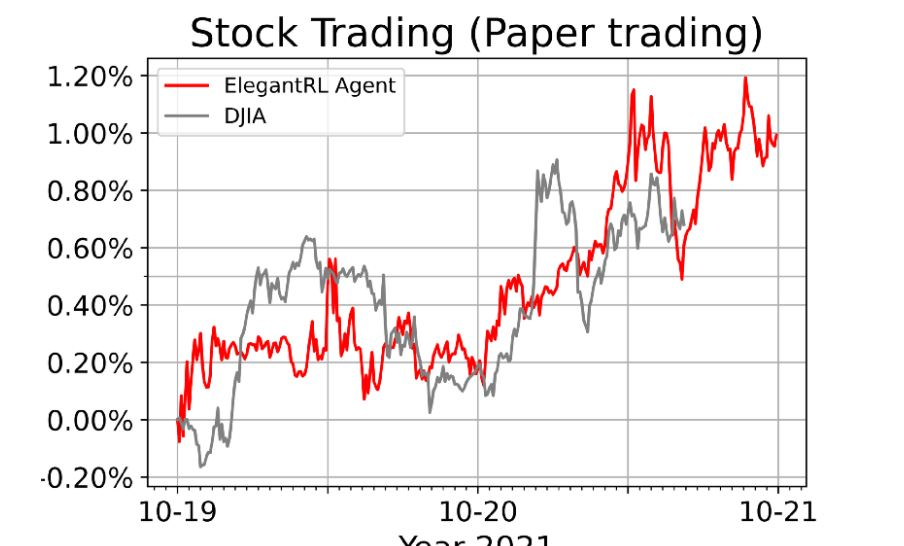

### Portfolio results

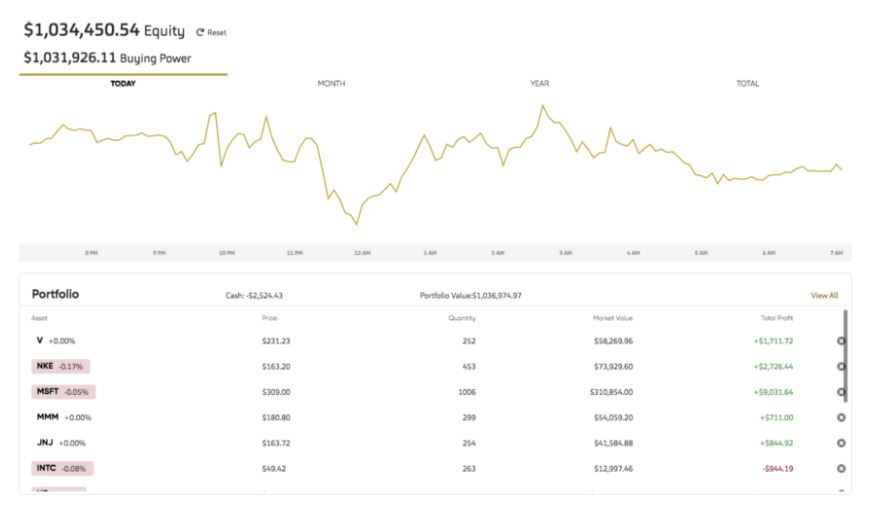

# Theory



## What is Reinforcement learning?

* Reinforcement learning is a branch of machine learning dedicated to training agents to operate in an environment, in order to maximize their utility in the pursuit of some goals.

* Its underlying idea, is that intelligence is an emergent property of the interaction between an agent and its environment. This property guides the agent’s actions by orienting its choices in the conduct of some tasks.

* The system is described as an agent that interacts with the environment through actions at discrete time steps and is rewarded. This causes the agent to enter a new state. The figure below depicts a classic agent-environment feedback loop.

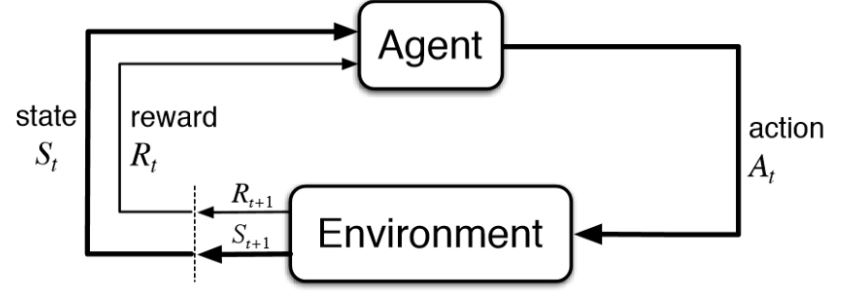

* We can say, analogously, that intelligence is the capacity of the agent to select the appropriate strategy in relation to its goals. Strategy, a teleologically-oriented subset of all possible behaviors, is here connected to the idea of “policy”.

* The main problem is the training data that is generated , is itself dependant on the policy because agent is generating training data by interacting with the enviroment instead of dependant on static data(in supervised learning).
* So if we change the hyperparameters a bit, then it has a huge impact on results.

To overcome these problems faced, OpenAI introduced a new algorithm known as PPO(Proximal Policy Optimization) .

The main aim of PPO was:     
* Easy code 
* Sample efficient
* Easy to tune


Let's take our example here, to dive deep into mathematical part of the algorithm and its intuitions.

Here we are applying the RL in stock market trading to implement a strategy for getting maximise rewards. 

So from the above figure , we can say here that our agent will make decisions like sell, buy or hold the shares. This are called the actions of the agent.

From the actions , we will get the new state i.e. remaining shares and equity balance in account as well as we get the reward(here its profit or loss).

**So the main aim is to train the agent to make decisions like selling,buying or holding shares in order to get more and more profit.**



## Proximal Policy Optimization

### OBJECTIVE FUNCTION 

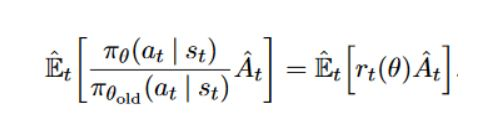

Here $Π_{Θ}$ is probability distribution from the output of the network, takes observed states as an input and gives the actions as an output.

$a_{t}$ : action, 
$s_{t}$ : state 

$Â_{t}$ is the estimate of the relative value of the selected action.

$Â_{t}$ is estimated from the discounted rewards - baseline estimate

**Discounted rewards/returns** :   weighted sum of the rewards the agent got during each time step in the current episode.
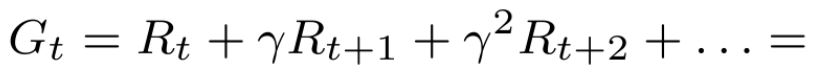
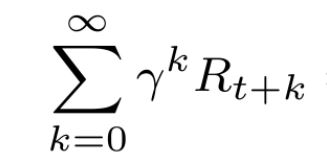

Here $G_{t}$ : discounted return, $R$: Reward

* the discount $\gamma$ is between 0 to 1 is the present value of future rewards.
* The value of recieving reward R after k+1 time-step is $\gamma^{k}R$

While baseline estimation is the estimate of the discounted return from this point onwards.

So $A_{t}$= Discounted return - baseline estimation

In layman's terminology , discounted return is we know what happened, and Baseline estimate is what did we expect would happen.

So basically it shows, what the action our agent took was it better than expected or worse.

Hence we multiply the log probabilities of the actions with the advantage function we get function objective that is used in policy gradient.

$$LPG_{θ} =E_{t}[logπ_{θ}(a_{t}|s_{t})A_{t}]$$
So if the $A_{t}$ is positive , means our strategy gave more rewards than expected average , so will multiply it to log probability function and will increase the probability to select that action which gave profit.

And if $A_{t}$ is negative , means our strategy gave less rewards than expected average , so will multiply it to log probability function and will decrease the probability to select that action which gave profit.


Now the problem here is if you run the gradient descent on the one batch of collected experience, what will happen is you will update the parameters in your networks so far that outside of the range that the data was collected , the advantage will be the noisy estimate . Hence you will destroy your policy by keep running gradient descent on a single batch of collected experience .

To solve this problem one new idea was implemented from the paper of TRPO(Trust region problem optimization). The just tweek the old formula by removing the log and adding just the old state probabilities in division. we will be taking the ratio of current policy and old policy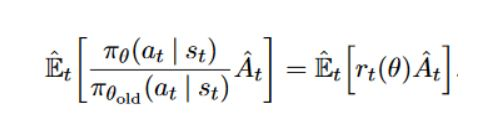

Let's dive into algorithm basics.

Consider $r_{t}$ as the ration of current to old streategy.
Initially $r(Θ)_{old}$=1

So if the $r_{t}$ is between 0 to 1, the old policy giving less rewards as compare to the old policy. And if its greater than 1 , the current policy is giving more rewards as compare to the old one.

We will be also clipping the ratio and will the minimum of the two i.e b/w clipped and unclipped.
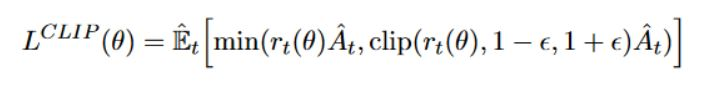

The first term is normal policy gradients objective and second one the clipped version of normal policy gradients objective.Here $ϵ$ is usually 0.2. 

**Why cliiping is neccessary?**

As shown before , $A_{t}$ can be both positive and negative. Here is the diagram :   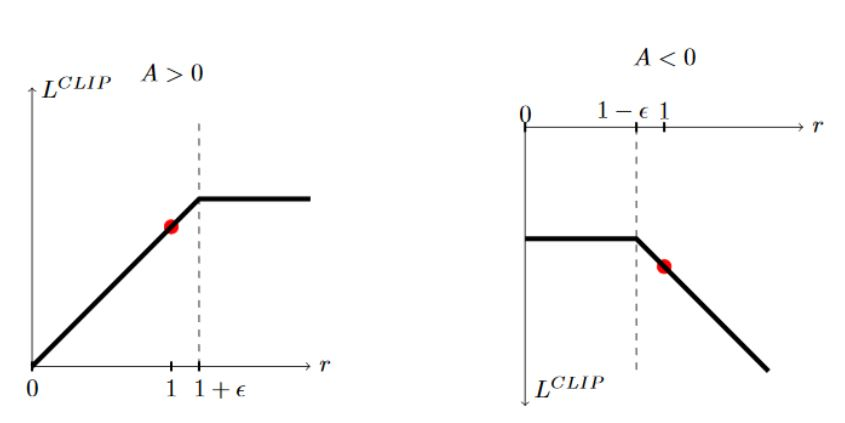

The left half of the diagram is A > 0 , meaning we are getting more rewards than average . So the action is consider good , so even if its good and we are applying more gradient step which is unnecessary, might gets worse. So we clip the function , and stop updating once we reached $1+ϵ$.

The right half of the diagram is A < 0 , meaning we are getting less rewards than average . So the action is consider bad , and its just became a lot less probable , don't keep reducing it's likelihood too much for now.Hence more updating , make policy more worse, hence stop updating while you reach at $1-ϵ$

### ALGORITHMIC STEPS


* Trade shares for n steps and store state, action probability, rewards, done variables.
* Apply the Generalized Advantage Estimation method on the above experience. We will see this in the coding section.
* Train neural networks for some epochs by calculating their respective loss.
* Test this trained model for “m” episodes.
* If the average reward of test episodes is larger than the target reward set by you then stop otherwise repeat from step one.

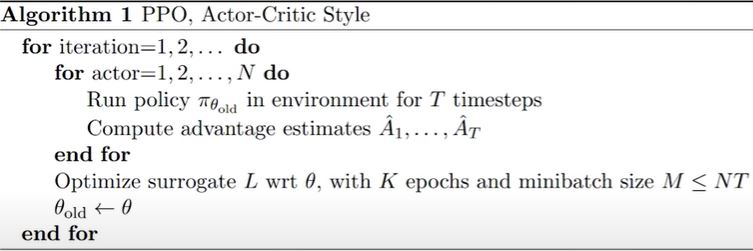

In the first part, the current policy is interacting with the enviroment , generating sequences , for which we calculate the estimated advantage using the baseline estimate for the state values. And in second part , for all the episodes, it will collect all the experience learn and runs the gradient descent on the policy network using the clips PPO objective. 

## Final objective function for PPO

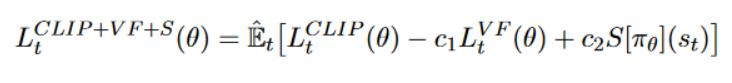

Here the **first term** $L_{t}^{CLIP}(θ)$ is the clip term , we just stated above. 

The **second term** is $c_{1}L_{t}^{VF}(θ)$ is the incharge of updating the baseline network.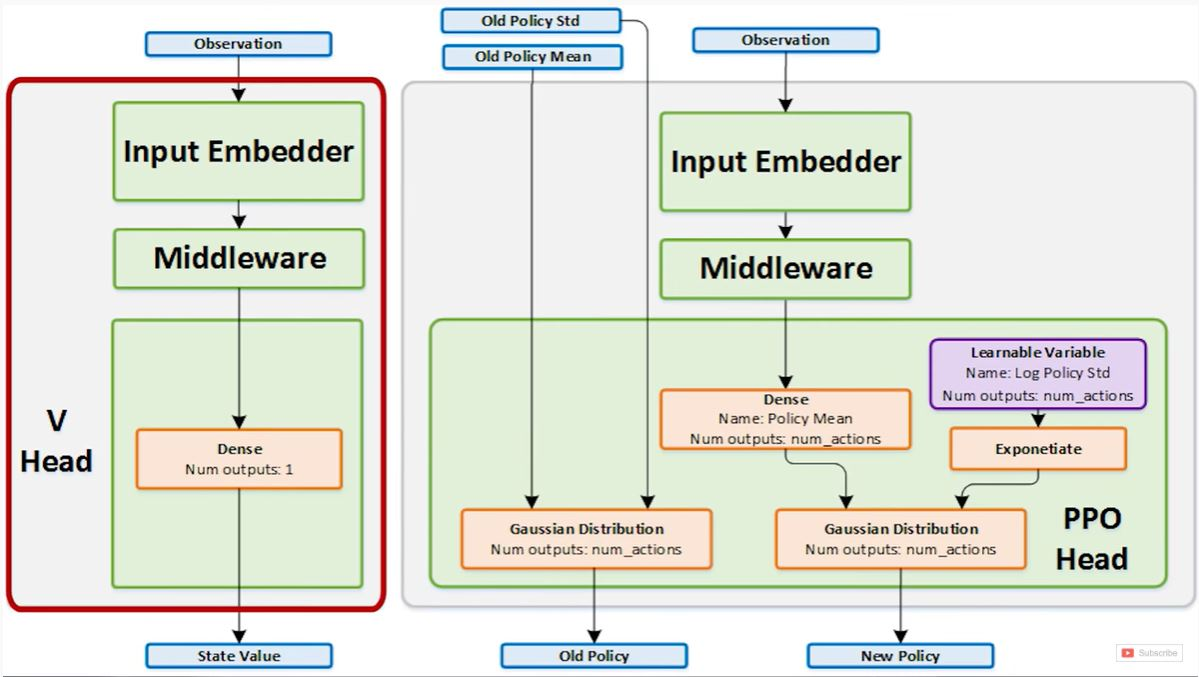

The left side part is the incharge of estimating how good , it is to be in this state/average amount of discounted rewards . Basically its, MSE of our critic net i.e squared loss of state values predicted and target.The value estimation network shared large parameters with the policy network , in order to get best policy. 

And the **third part** of equation is entropy to encourage exploration. This takes care of our agent doing enugh exploration during training.

Entropy in machine learning is related to randomness in the information being processed.

In many RL learning algorithms, such as the policy-gradient and actor-critic families, the actions are defined as a probability distribution, condition on the state of the environment: p(a | s). When an agent takes a discrete action, picking one of many possible actions, a categorical distribution is used. In the case of a continuous control agent, a gaussian distribution with a mean and standard deviation may be used. With these kinds of policies, the randomness of the actions an agent takes can be quantified by the entropy of that probability distribution.

Because RL is all about learned behaviors, entropy here relates directly to the unpredictability of the actions which an agent takes in a given policy. The greater the entropy, the more random the actions an agent takes.

In RL, the goal is typically optimizing the long-term sum of discounted rewards. This means learning to take specific sequences of actions which can accomplish this goal at the exclusions of other possible action sequences. Such a learning process will naturally lead to the entropy of the action selection policy decreasing. This is only reasonable, since if we expect purposeful and coordinated behavior, then that behavior will naturally be less random than the original policy.

To allow the model to explore more, an entropy bonus is added to the loss function which basically change the distribution of probability and hence allow a higher chance of sampling exploratory actions.


### REFERENCES

* https://towardsdatascience.com/proximal-policy-optimization-ppo-with-tensorflow-2-x-89c9430ecc26

* https://towardsdatascience.com/policy-gradients-in-a-nutshell-8b72f9743c5d

* PPO paper:   https://arxiv.org/abs/1707.06347
* TRPO paper: https://arxiv.org/abs/1502.05477

* Base implementation : https://github.com/higgsfield/RL-Adventure-2/blob/master/3.ppo.ipynb